# AIPC 2022-2023

<center>
    <img src="https://physique.univ-paris-diderot.fr/sites/all/themes/diderot/logo.png" height="300px" alt="Logo Université Paris Diderot" /> 
<img src="https://u-paris.fr/wp-content/uploads/2019/03/Universite_Paris_logo_horizontal.jpg" height=300 alt="Logo Université de Paris" />
</center>

---

## Introduction à python : exercices - suggestion de correction
![python logo](https://www.python.org/static/img/python-logo.png "Python")

## Exercice 1 : utiliser un Jupyter notebook et calculs simples

* Dans votre notebook python, créer au moins 4 cellules, une avec du texte brut (raw), une avec du Markdown et éventuellement des formules simples en $\LaTeX$, une avec du code.
* Calculer : 
 * $1+2\times 3$, This is raw text
 * $(1+2)\times 3$, 
 * $2^3$,
 * $5/3$, 
 * et la division entière ainsi que le reste de 5 divisé par 3
 * Calculer $\sin(\pi/2)$, $\arctan(1)$, $e^1$.
* Vérifier que $e^{i\pi}=-1$.

This is *Markdown* text 

This is an example of $\LaTeX$ formula : $$\lim_{x\to\infty}e^{-x}=0$$

In [1]:
1+2*3

7

In [2]:
(1+2)*3

9

In [3]:
2**3

8

In [4]:
5/3

1.6666666666666667

In [5]:
5//3

1

In [6]:
5%3

2

In [7]:
import math as m
print(m.sin(m.pi/2))
print(m.atan(1))
print(m.exp(1))

1.0
0.7853981633974483
2.718281828459045


In [8]:
import cmath as cm
a=complex(0,m.pi)
print(cm.exp(a))

(-1+1.2246467991473532e-16j)


## Exercice 2 : structures de contrôle

* Créer une fonction qui calcule $$\sum_{i=0}^Ni$$ quand $N$ est donné en argument
* Créer une fonction qui produise ceci en sortie :

```
*
**
***
****
*****
******
```

* Créer une fonction qui indique lorsqu'un nombre est pair.

In [9]:
def mysum1(N):
    s=0;
    for k in range(N):
        s=s+k+1
    return s

def mysum2(N):
    return (int)(N*(N+1)/2)

print(mysum1(10),mysum2(10))

55 55


In [10]:
s=""
for k in range(6):
    s+="*"
    print(s)

*
**
***
****
*****
******


In [11]:
def print_parity(k):
    if k%2 == 0:
        print(str(k)+" is even")
    else:
        print(str(k)+" is not even")
        
print_parity(124)
print_parity(123)

124 is even
123 is not even


## Exercice 3 : un peu de mécanique…

Imaginons une masse de $m=1\;\textrm{kg}$ qui chute avec une vitesse initiale verticale $v_0$ de la position initiale $z_0=0$. 
Cette masse est sujette à une accélération de pesanteur $g$. On ne prend pas en compte de frottement ici.

* Calculer la position $z$ de la masse en fonction de $t$ à chaque seconde jusqu'à 10 secondes pour différentes vitesse initiales. Tracer $z(t)$.

* Modifier ce bout de code afin d'introduire l'outil`interact` widget, $v_0$ étant le paramètre.

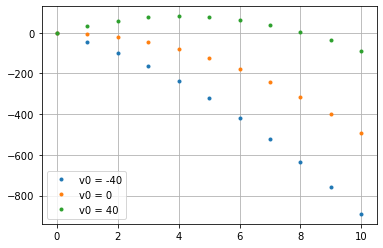

In [12]:
import numpy as np
import matplotlib.pyplot as plt
m=1 # not used :) !
g=-9.81
t=np.arange(0,11,1)
for v0 in [-40,0,40]:
    z=1/2*g*t**2+v0*t
    plt.plot(t,z,'.',label="v0 = "+str(v0))
    
plt.grid()
plt.legend()

In [13]:
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
m=1 # not used :) !
g=-9.81
t=np.arange(0,11,1)

def f(v0):
    z=1/2*g*t**2+v0*t
    plt.plot(t,z,'.',label="v0 = "+str(v0))
    plt.grid()
    plt.legend()
    
interact(f,v0=(-100,100,10))

interactive(children=(IntSlider(value=0, description='v0', min=-100, step=10), Output()), _dom_classes=('widge…

<function __main__.f(v0)>

## Exercice 4 : Statistiques simples

Imaginons un lot de 100 résistors. Le constructeur prétend qu'ils ont une résistance $R$ de $R_0=220\;\Omega$ avec une *erreurr* de $5\%$. 

Parce que l'on ne peut pas vraiment interpréter ce que le constructeur entend par *erreur*, on simule le lot de résistances sous les deux hypothèses suivantes : 
* soit la pdf de $R$ est plate à $\pm5\%$
* soit la pdf est normale avec $\sigma=R_0\times5\%$

Produire les histogrammes de ces deux distributions. Ajuster la seconde avec une gaussienne. Comparer la déviation standard avec le $\sigma$ ajusté. Être sûr d'être capable d'identifier tous les paramètres ajustés.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

N=100
R0=220
err=5/100

r1=2*err*R0*np.random.random(N)+R0*(1-err)
r2=R0+np.random.randn(N)*err*R0

(array([11.,  6.,  8., 12.,  7.,  9., 10., 14.,  8., 15.]),
 array([209.05851803, 211.23025896, 213.40199989, 215.57374082,
        217.74548175, 219.91722268, 222.08896361, 224.26070454,
        226.43244547, 228.6041864 , 230.77592733]),
 <BarContainer object of 10 artists>)

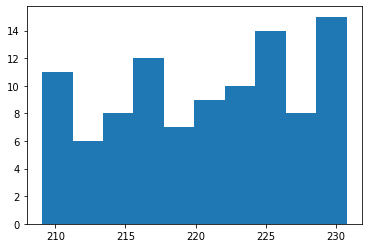

In [15]:
plt.hist(r1)

[596.1168554  220.72312901  11.00935445]


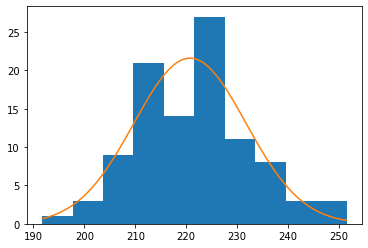

In [16]:
from scipy import optimize
from scipy.stats import norm
h=plt.hist(r2)
num=h[0]
centers=(h[1][1:]+h[1][0:-1])/2
def myg(x,k,x0,s0):
    return k*norm.pdf(x,x0,s0)

p1,p2=optimize.curve_fit(myg,centers,num,p0=[100,200,10])
print(p1)

rmin=min(r2)
rmax=max(r2)
r=np.linspace(rmin,rmax,100)
plt.plot(r,myg(r,p1[0],p1[1],p1[2]))

In [17]:
np.std(r2)

10.971056772862726

In [18]:
p1[0]/(centers[1]-centers[0]) # Should be equal to N. One may prefer to fit with fixed k.

99.82649025681351

## Exercice 5 : Lire et analyser un fichier

* Lire le fichier `file2.txt` où l'on trouve en colonne les vecteurs de `x` et de `y`. Tracer alors `y` en fonction de `x`.
* (plus difficile) Lire le fichier `csv` nommé `F0004CH2.CSV`, issu d'un canal d'oscilloscipe Tektronik. On s'intéresse à tracer la tension en fonction du temps, le temps étant stocké dans la dernière colonne.

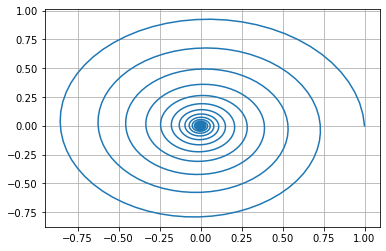

In [20]:
import matplotlib.pyplot as plt
with open('file2.txt', 'r') as f:
    lines = f.readlines()
    x = [float(line.split()[0]) for line in lines]
    y = [float(line.split()[1]) for line in lines]
plt.plot(x ,y)
plt.grid()

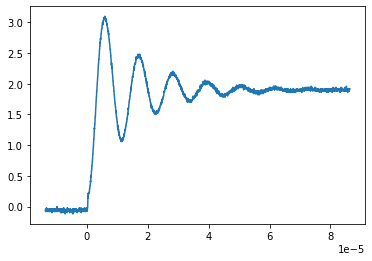

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import csv
t=np.array([])
y=np.array([])
with open('F0004CH2.CSV') as csvfile:
    r = csv.reader(csvfile,delimiter=',')
    for row in r:
        t=np.append(t,float(row[3]))
        y=np.append(y,float(row[4]))
plt.plot(t,y)

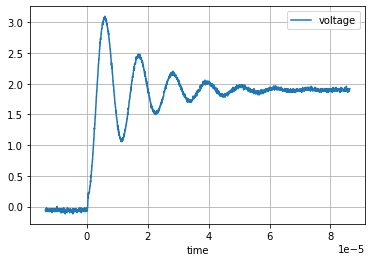

In [29]:
# Other solution with pandas, more efficient, more readable
import pandas
data=pandas.read_csv('F0004CH2.CSV',usecols=[3,4],header=None,names=['time','voltage'])
fig=data.plot("time","voltage")
fig.grid()